# Tutorial-XClone on TNBC1 scRNA-seq

scRNA-seq data

Author: Rongting Huang


Date: 2022-11-17

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import xclone
xclone.__version__

import pandas as pd
import numpy as np
import scipy
scipy.__version__

import anndata as an

xclone.pp.efficiency_preview()

import warnings
warnings.filterwarnings('ignore')

'0.3.1'

'1.7.0'

[XClone efficiency] multiprocessing cpu total count in your device 112


## load dataset

In [6]:
RDR_adata = xclone.data.tnbc1_rdr()
BAF_adata = xclone.data.tnbc1_baf()

## RDR module

[XClone RDR module running]************************
[XClone data preprocessing] check RDR raw dataset value: success
Keep valid cells: Filter out 0 cells / 1097 total cells, remain 1097 valid cells with annotation
[XClone data preprocessing] check RDR cell annotation: success
[XClone-RDR preprocessing] Filter out 16315 genes / 33472 total genes, remain 17157 genes
[XClone data preprocessing] detect RDR genes: done
[XClone-RDR preprocessing] Filter out 10724 genes / 17157 total genes, remain 6433 genes


Trying to set attribute `.var` of view, copying.


[XClone] use marker genes provided by users: 
 ['AC036214.3' 'AC093484.3' 'AL365205.1' 'ATP1A1' 'B2M' 'CD24' 'CRYAB'
 'CST3' 'CTSB' 'CYBA' 'DPYD' 'EMP3' 'EPCAM' 'GSTO1' 'H3F3A' 'HLA-A' 'HNMT'
 'HSP90AB1' 'KRT7' 'MRPL14' 'POLR1C' 'RAB31' 'RPL28' 'TM4SF1' 'TMSB4X'
 'TOMM6' 'TPD52' 'UBB' 'YIPF3' 'ZEB2']
filter_genes_num: 30
used_genes_num: 6403
output anndata is not sparse matrix.
['1', '2', '3', '17']
0 1873
['19', '5', '14', '2']
1 1391
[XClone RDR library ratio fitting] Time used: 0 seconds
[XClone RDR library ratio fitting] Time used: 16 seconds
[XClone RDR library ratio]: checking
max_value: 4.978008632808787
min_value: 0.25581933202911067
qt_0.95_value: 3.625555619193634
qt_0.05_value: 0.5104424008672037
[XClone RDR library ratio]: clipping
[XClone RDR library ratio]: checking
max_value: 4.978008632808787
min_value: 0.25581933202911067
qt_0.95_value: 3.625555619193634
qt_0.05_value: 0.5104424008672037


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 46 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: 52.8298388811891
min_value: 3.330895127931041e-72
qt_0.95_value: 4.162699785667388
qt_0.05_value: 0.04633867037721354
remove no GLM results genes num: 0
remove inf dispersion genes num: 0
[XClone RDR library ratio]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 2.9108165471046656
min_value: 0.0148038128518171
qt_0.95_value: 2.9108165471046656
qt_0.05_value: 0.04633867037721354
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['19q', '3p', '8q']
CNV loss:  0.642443047067482
CNV neutral:  1.2354090610596011
CNV gain:  2.904653922422906
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.64244305 1.23540906 2.90465392]
expression_brk [-0.6898304  5.8300295]
[XClone] CNV_optimazation iteration:  1
filter nan emm_prob
[XClone HMM smoothing] Time used: 14 seconds
[XClone] CNV_optimazation iteration:  2
[

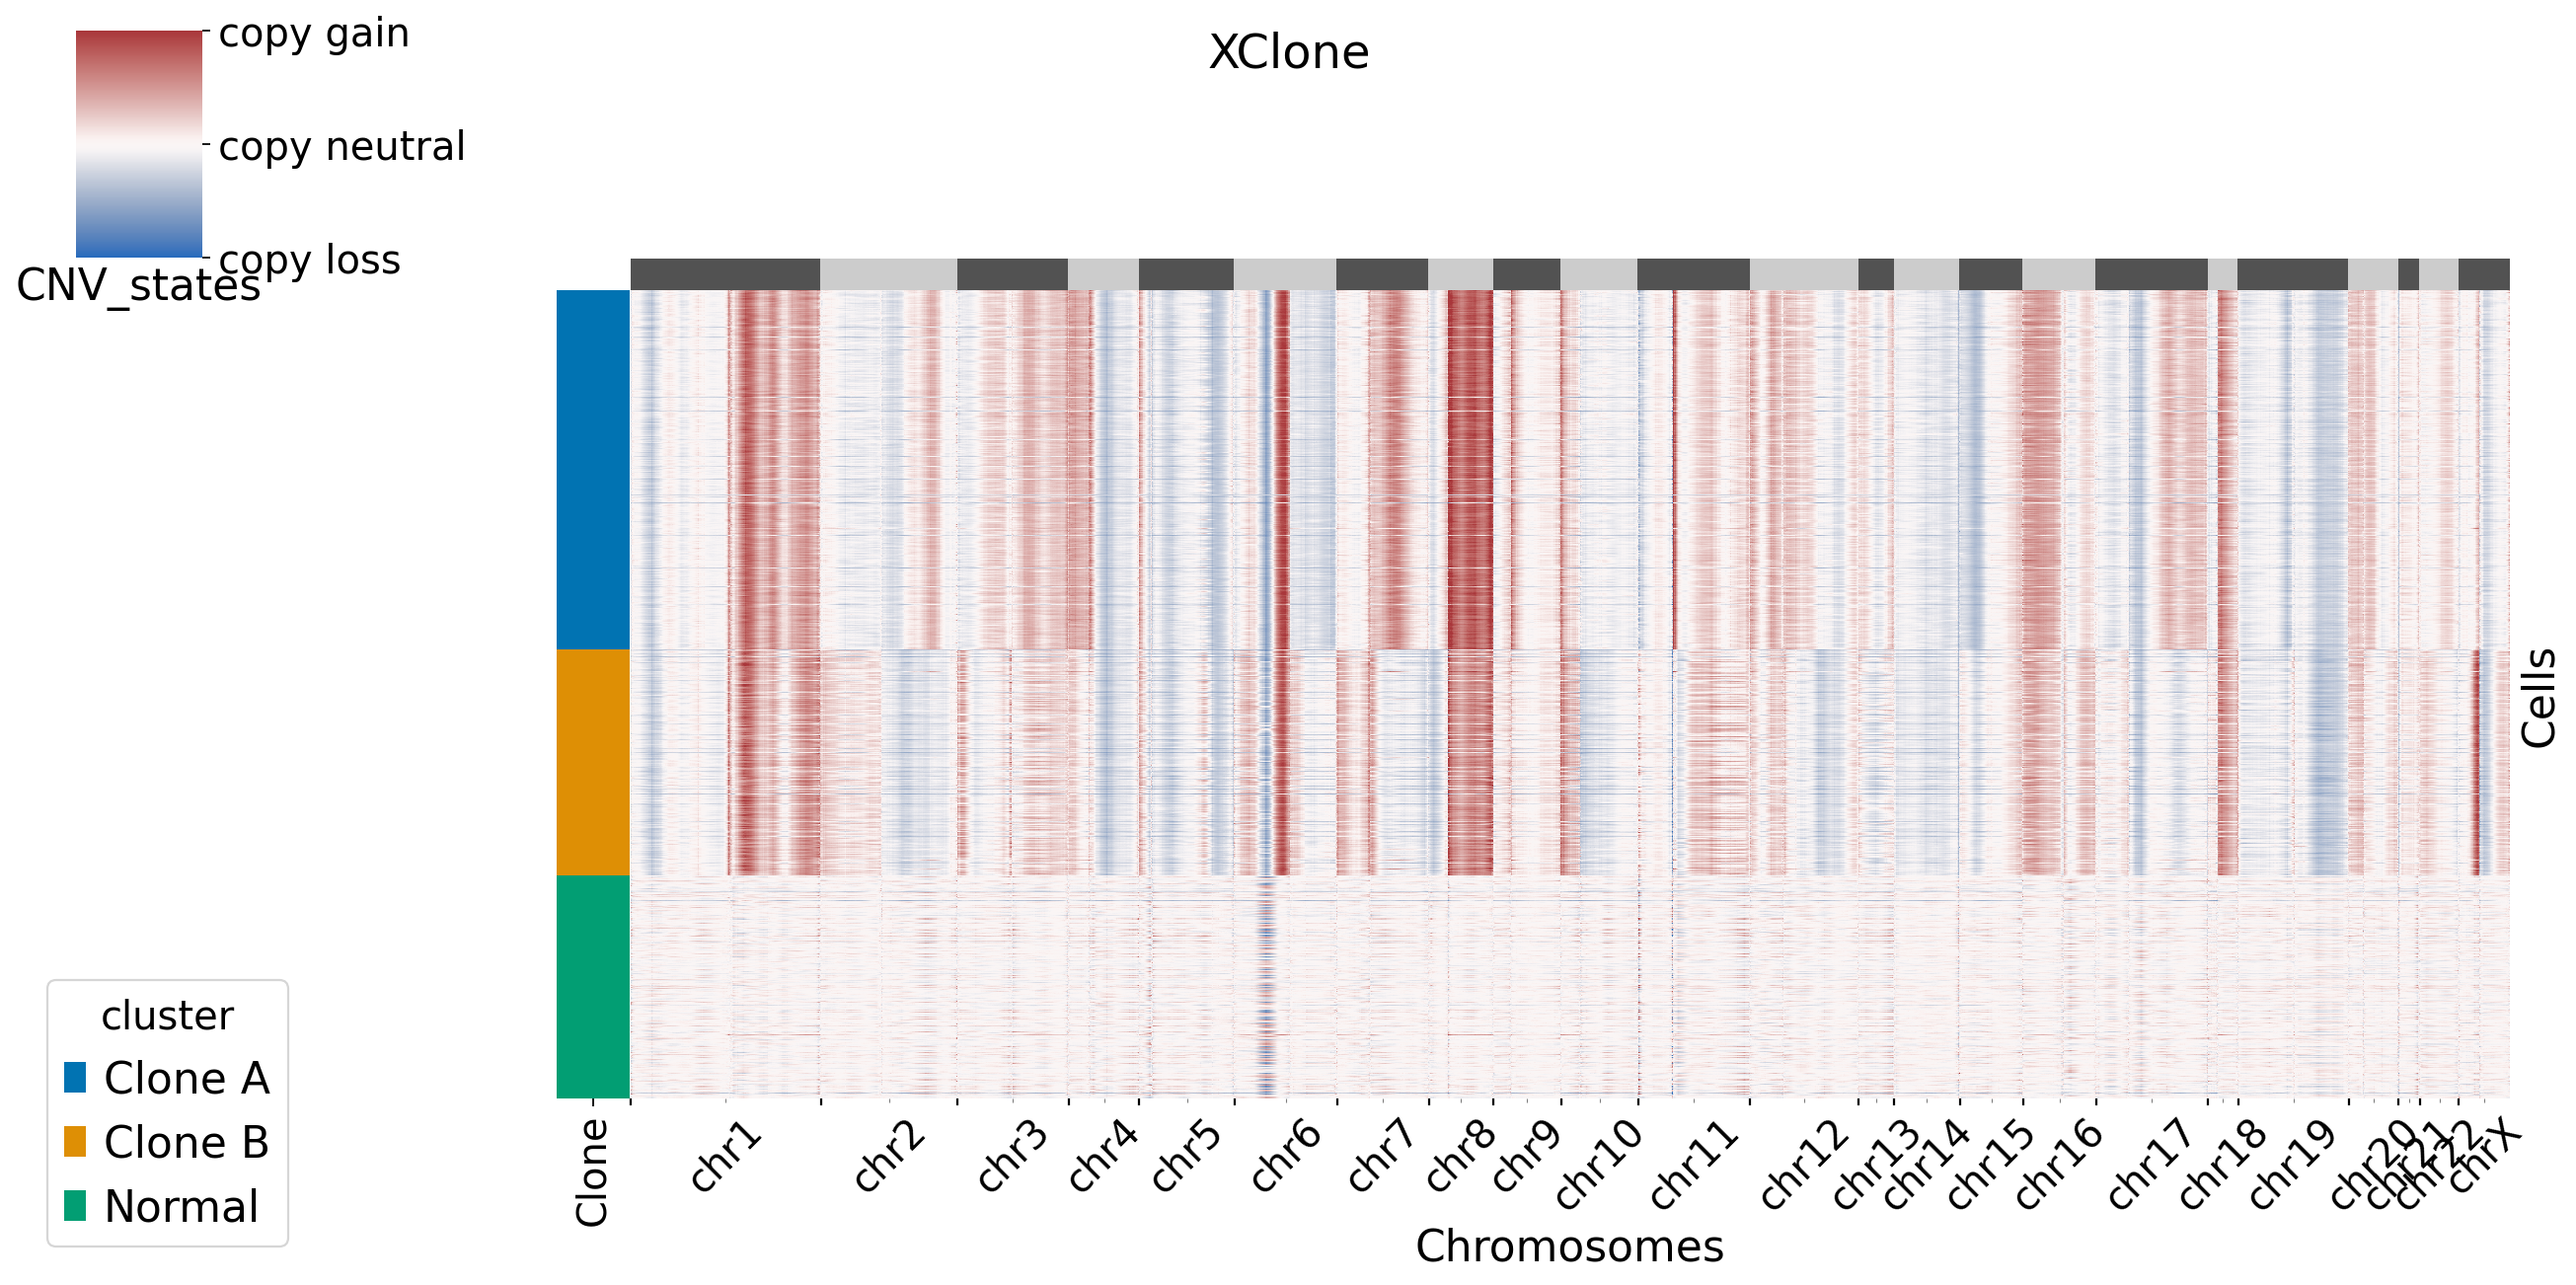

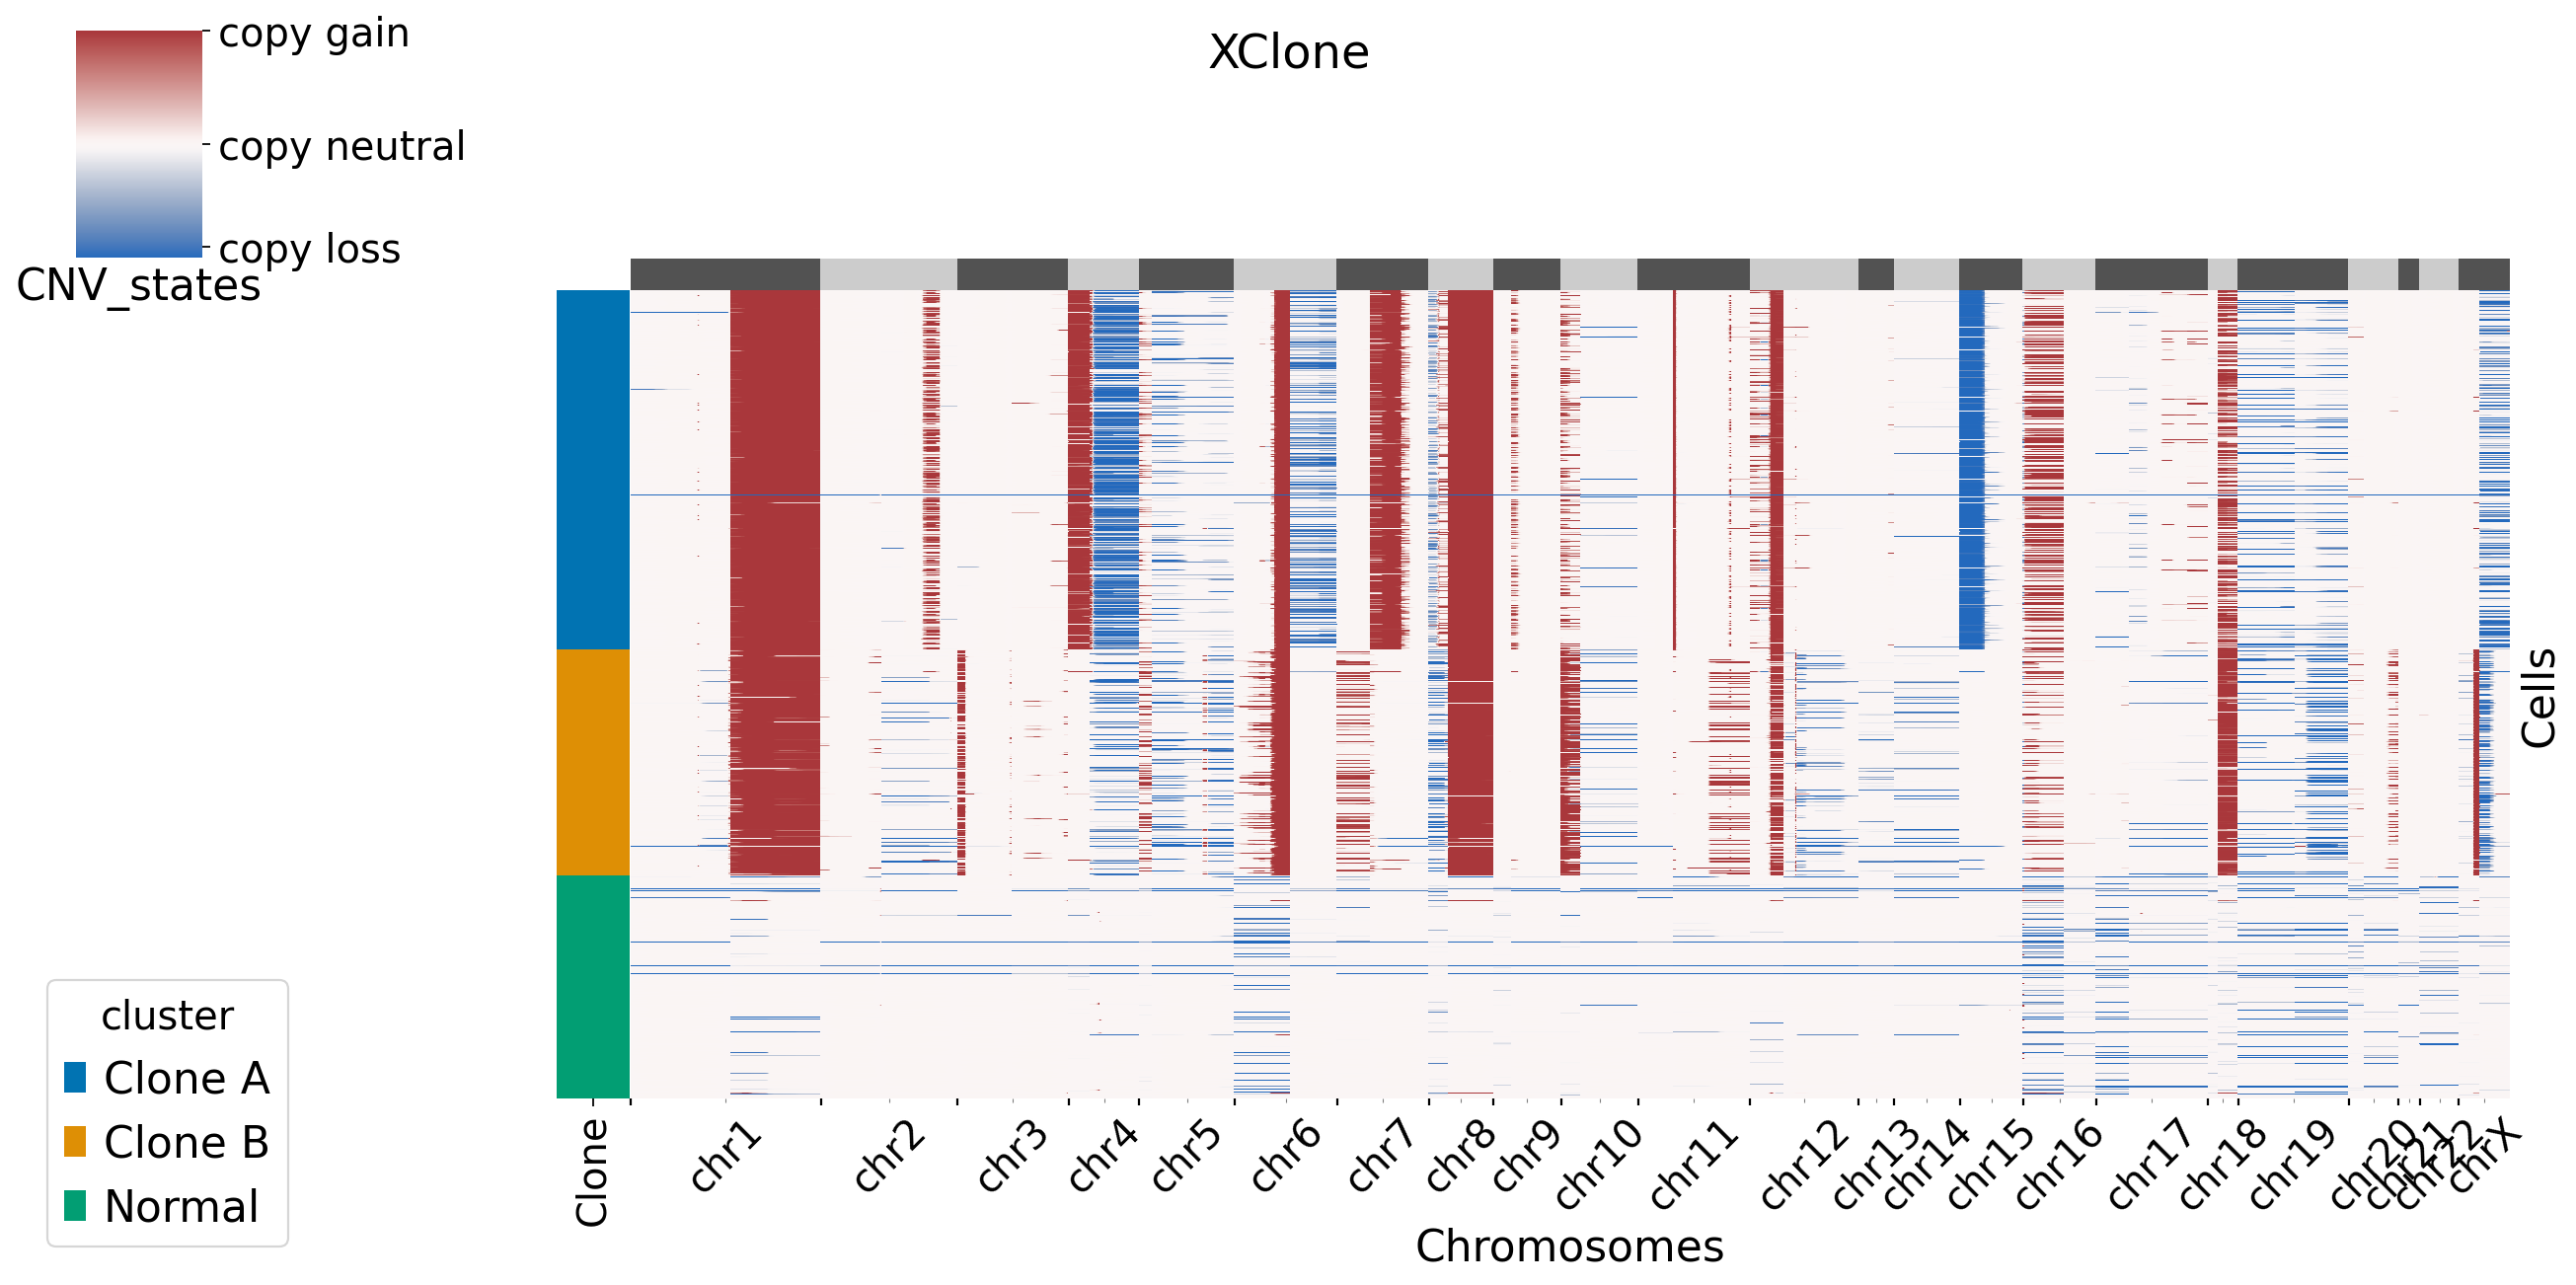

In [8]:
xconfig = xclone.XCloneConfig(dataset_name = "TNBC1_scRNA", module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/TNBC1_scRNA/"
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = 0.5
xconfig.smart_transform = False
xconfig.top_n_marker = 15
xconfig.marker_group_anno_key = "cluster.pred"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

## BAF moudle

[XClone BAF module running]************************
[XClone data preprocessing] check BAF raw dataset value: success
Keep valid cells: Filter out 0 cells / 1097 total cells, remain 1097 valid cells with annotation
[XClone data preprocessing] check BAF cell annotation: success
[XClone data checking]: RDR and BAF in same cell order
[XClone-data removing]:
Filter out 30 genes / 33472 total genes, remain 33442 regions
[XClone-Local_phasing] time_used: 68.49seconds
[XClone-Global_phasing] time_used: 4.31seconds


... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


[XClone get_CNV_states] time_used: 13.92seconds
do clipping at ref BAF
states used: [[0.3448917  0.49451827 0.65726365]
 [0.3448917  0.48255814 0.65726365]
 [0.3448917  0.52799667 0.65726365]
 ...
 [0.3448917  0.50332226 0.65726365]
 [0.3448917  0.49667774 0.65726365]
 [0.3448917  0.5        0.65726365]]
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 0 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 0.08seconds
filter nan emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 5 seconds


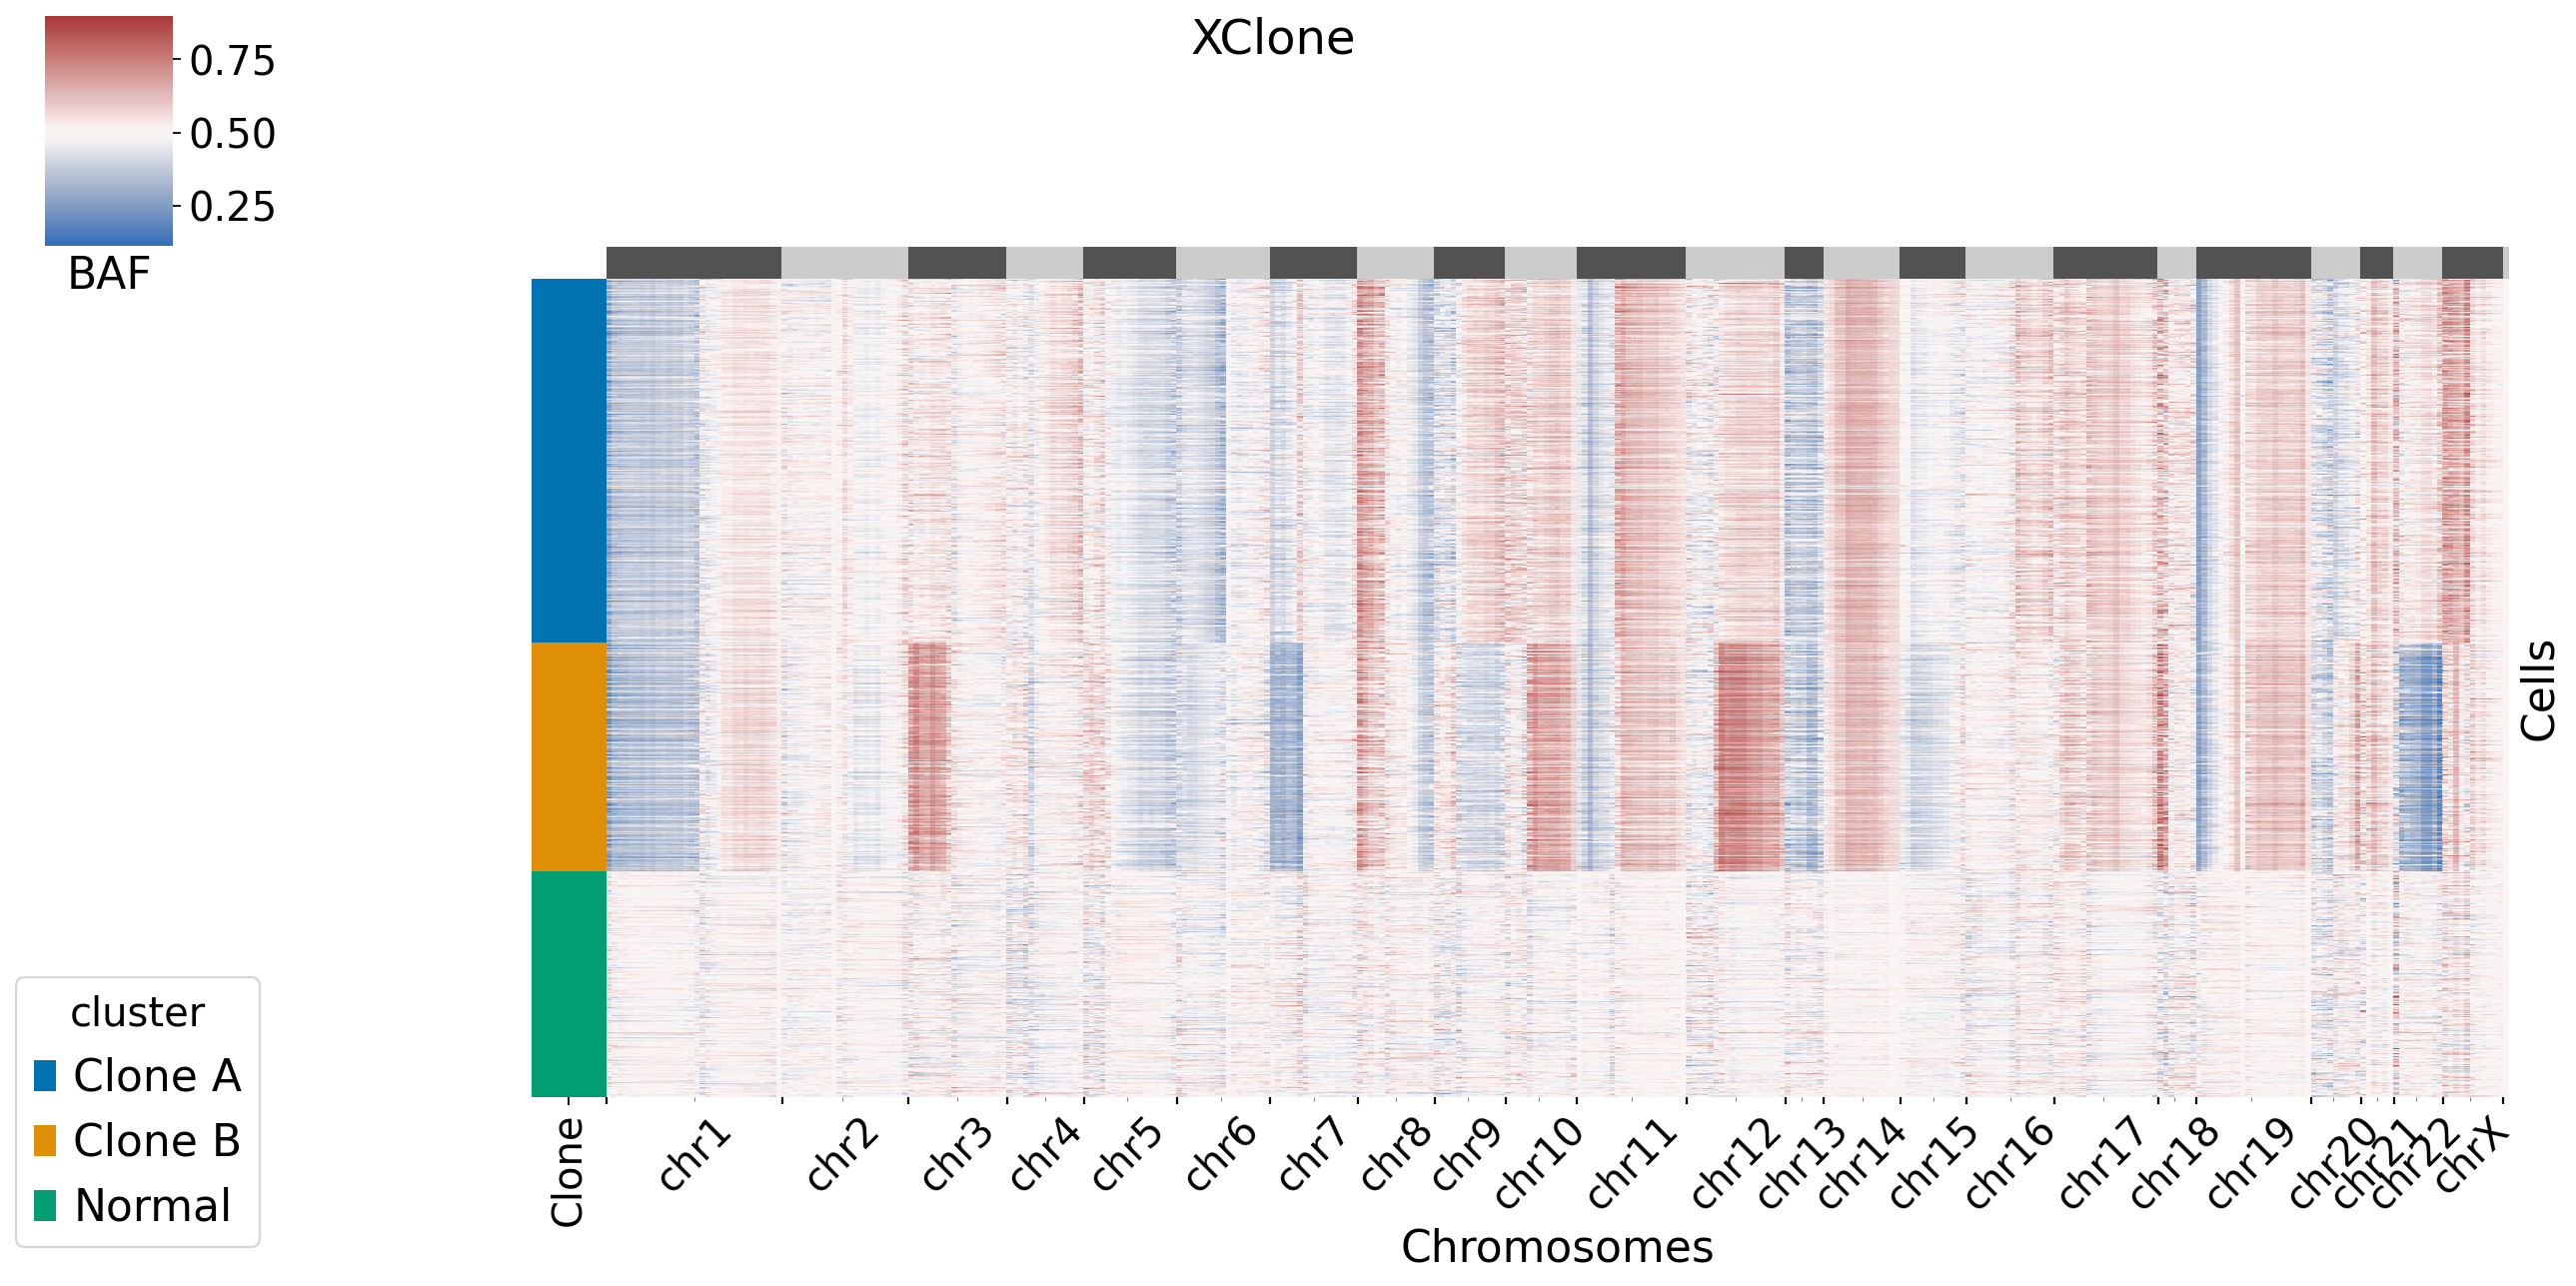

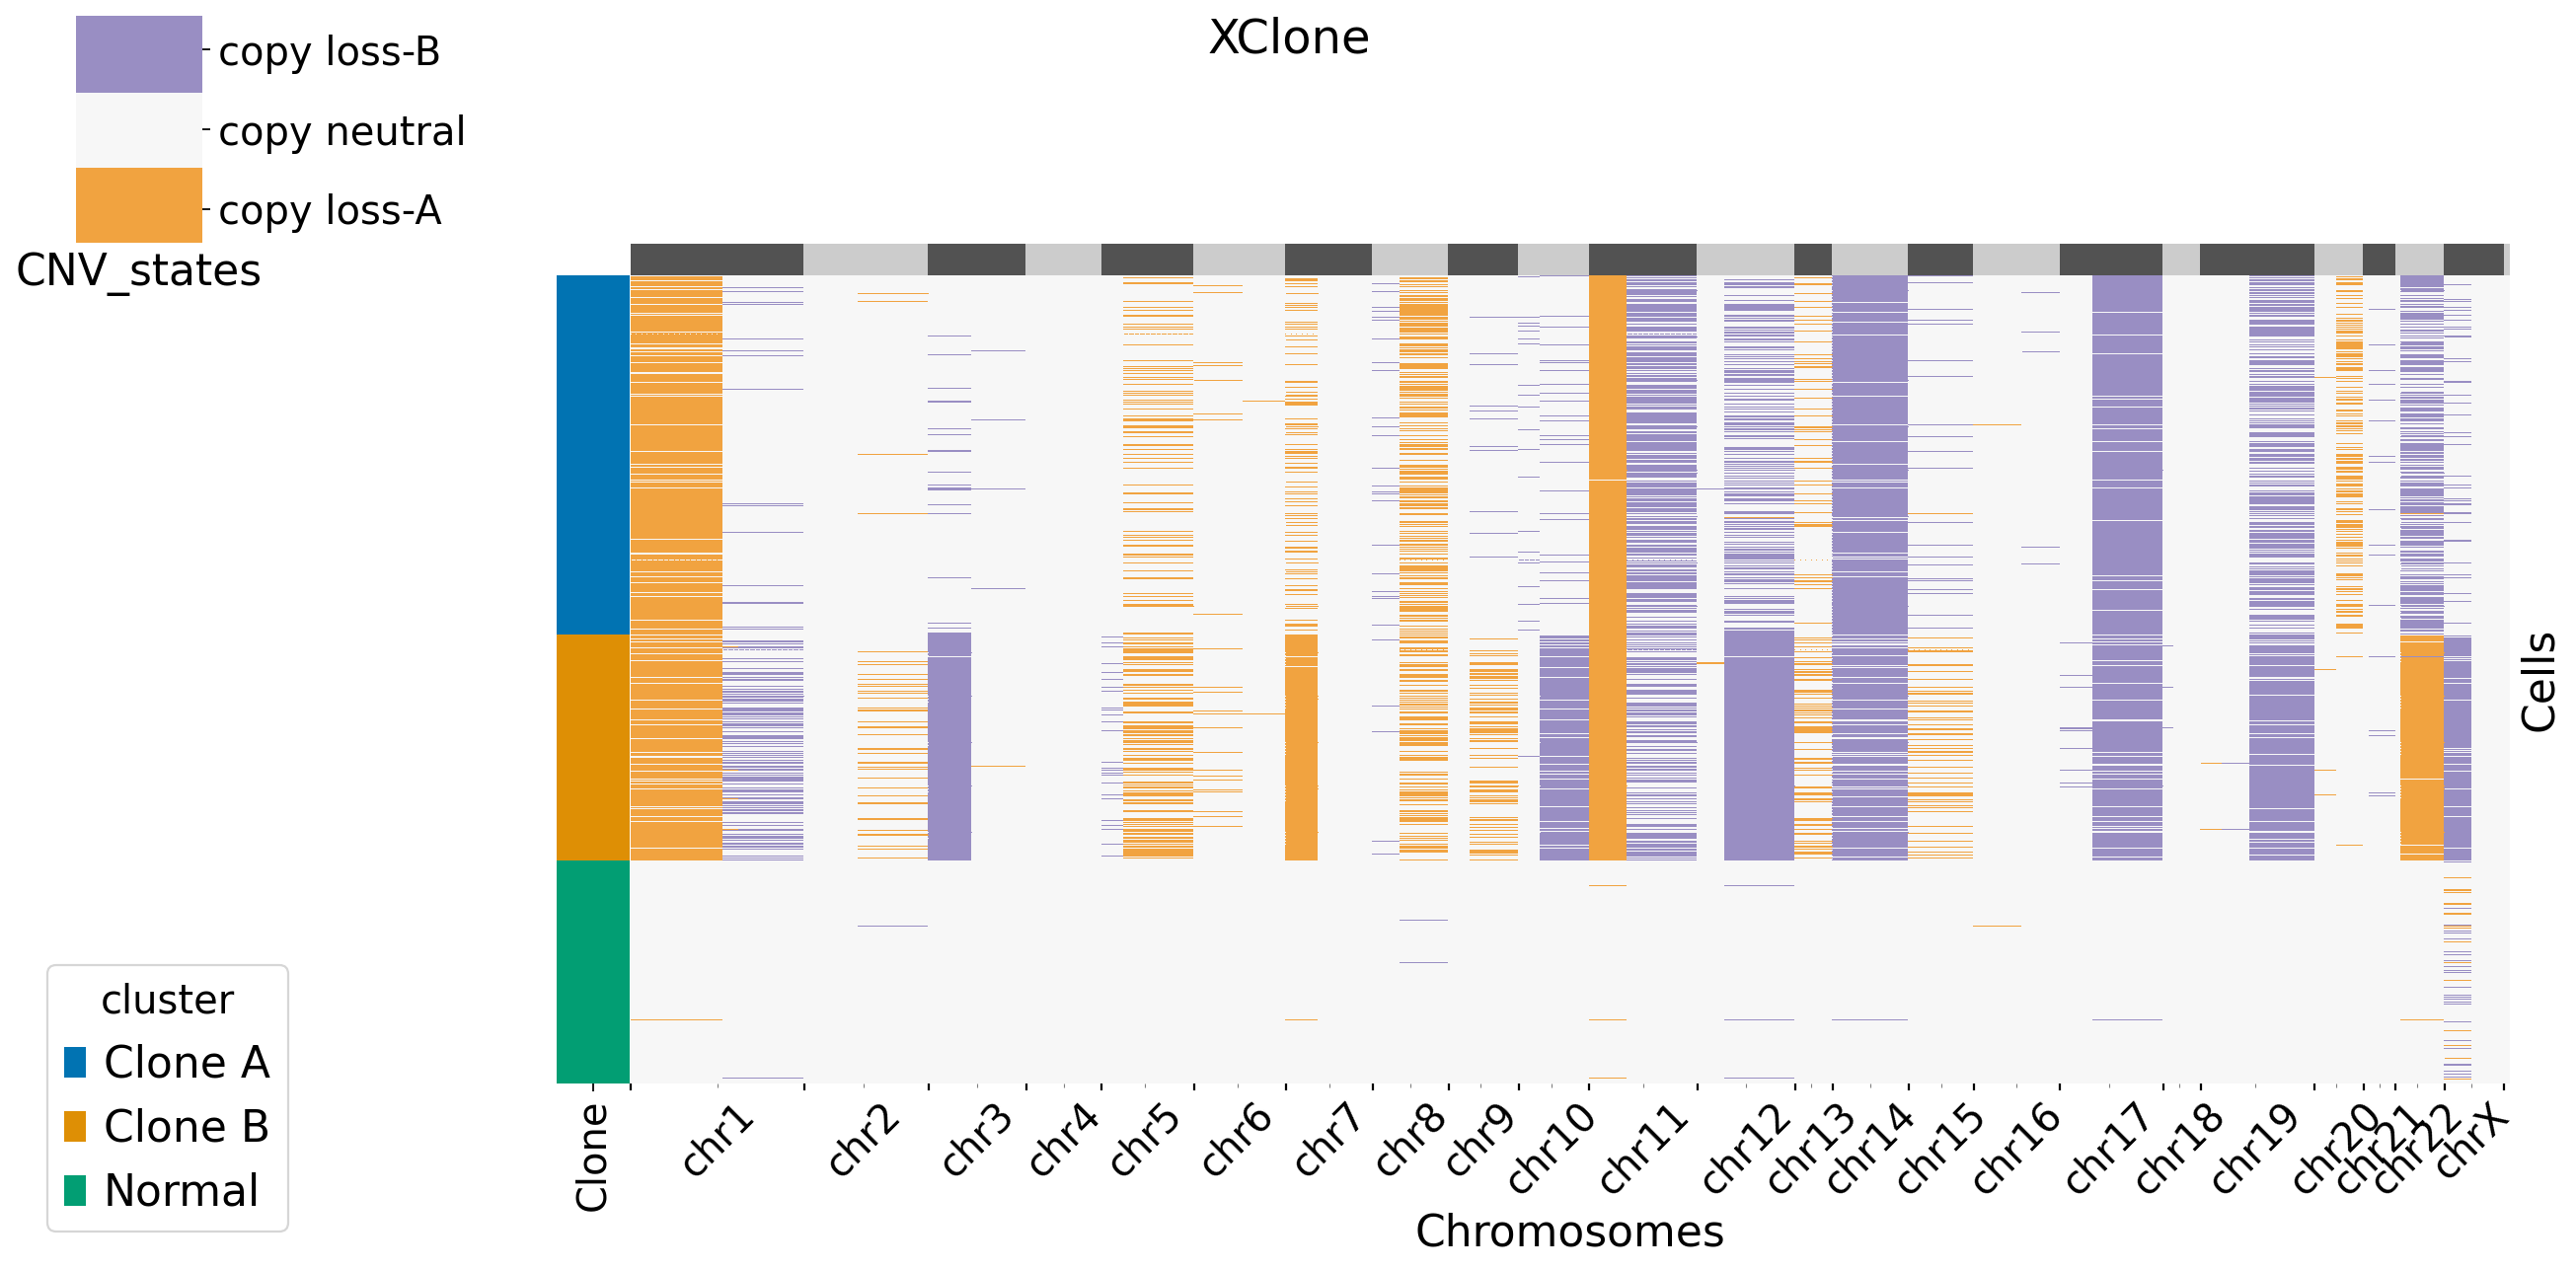

In [9]:
xconfig = xclone.XCloneConfig(dataset_name = "TNBC1_scRNA", module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/TNBC1_scRNA/"
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.start_prob = np.array([0.2, 0.6, 0.2])
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

## Combine module

[XClone Combination module running]************************
[XClone] BAF extend bins to genes.
[XClone data checking]: RDR and BAF in same cell order
No genes in this bin: 3103 3152 , skip this bin.
No genes in this bin: 21554 21654 , skip this bin.
No genes in this bin: 22754 22839 , skip this bin.
No genes in this bin: 30061 30063 , skip this bin.
No genes in this bin: 33372 33472 , skip this bin.
[XClone plotting]


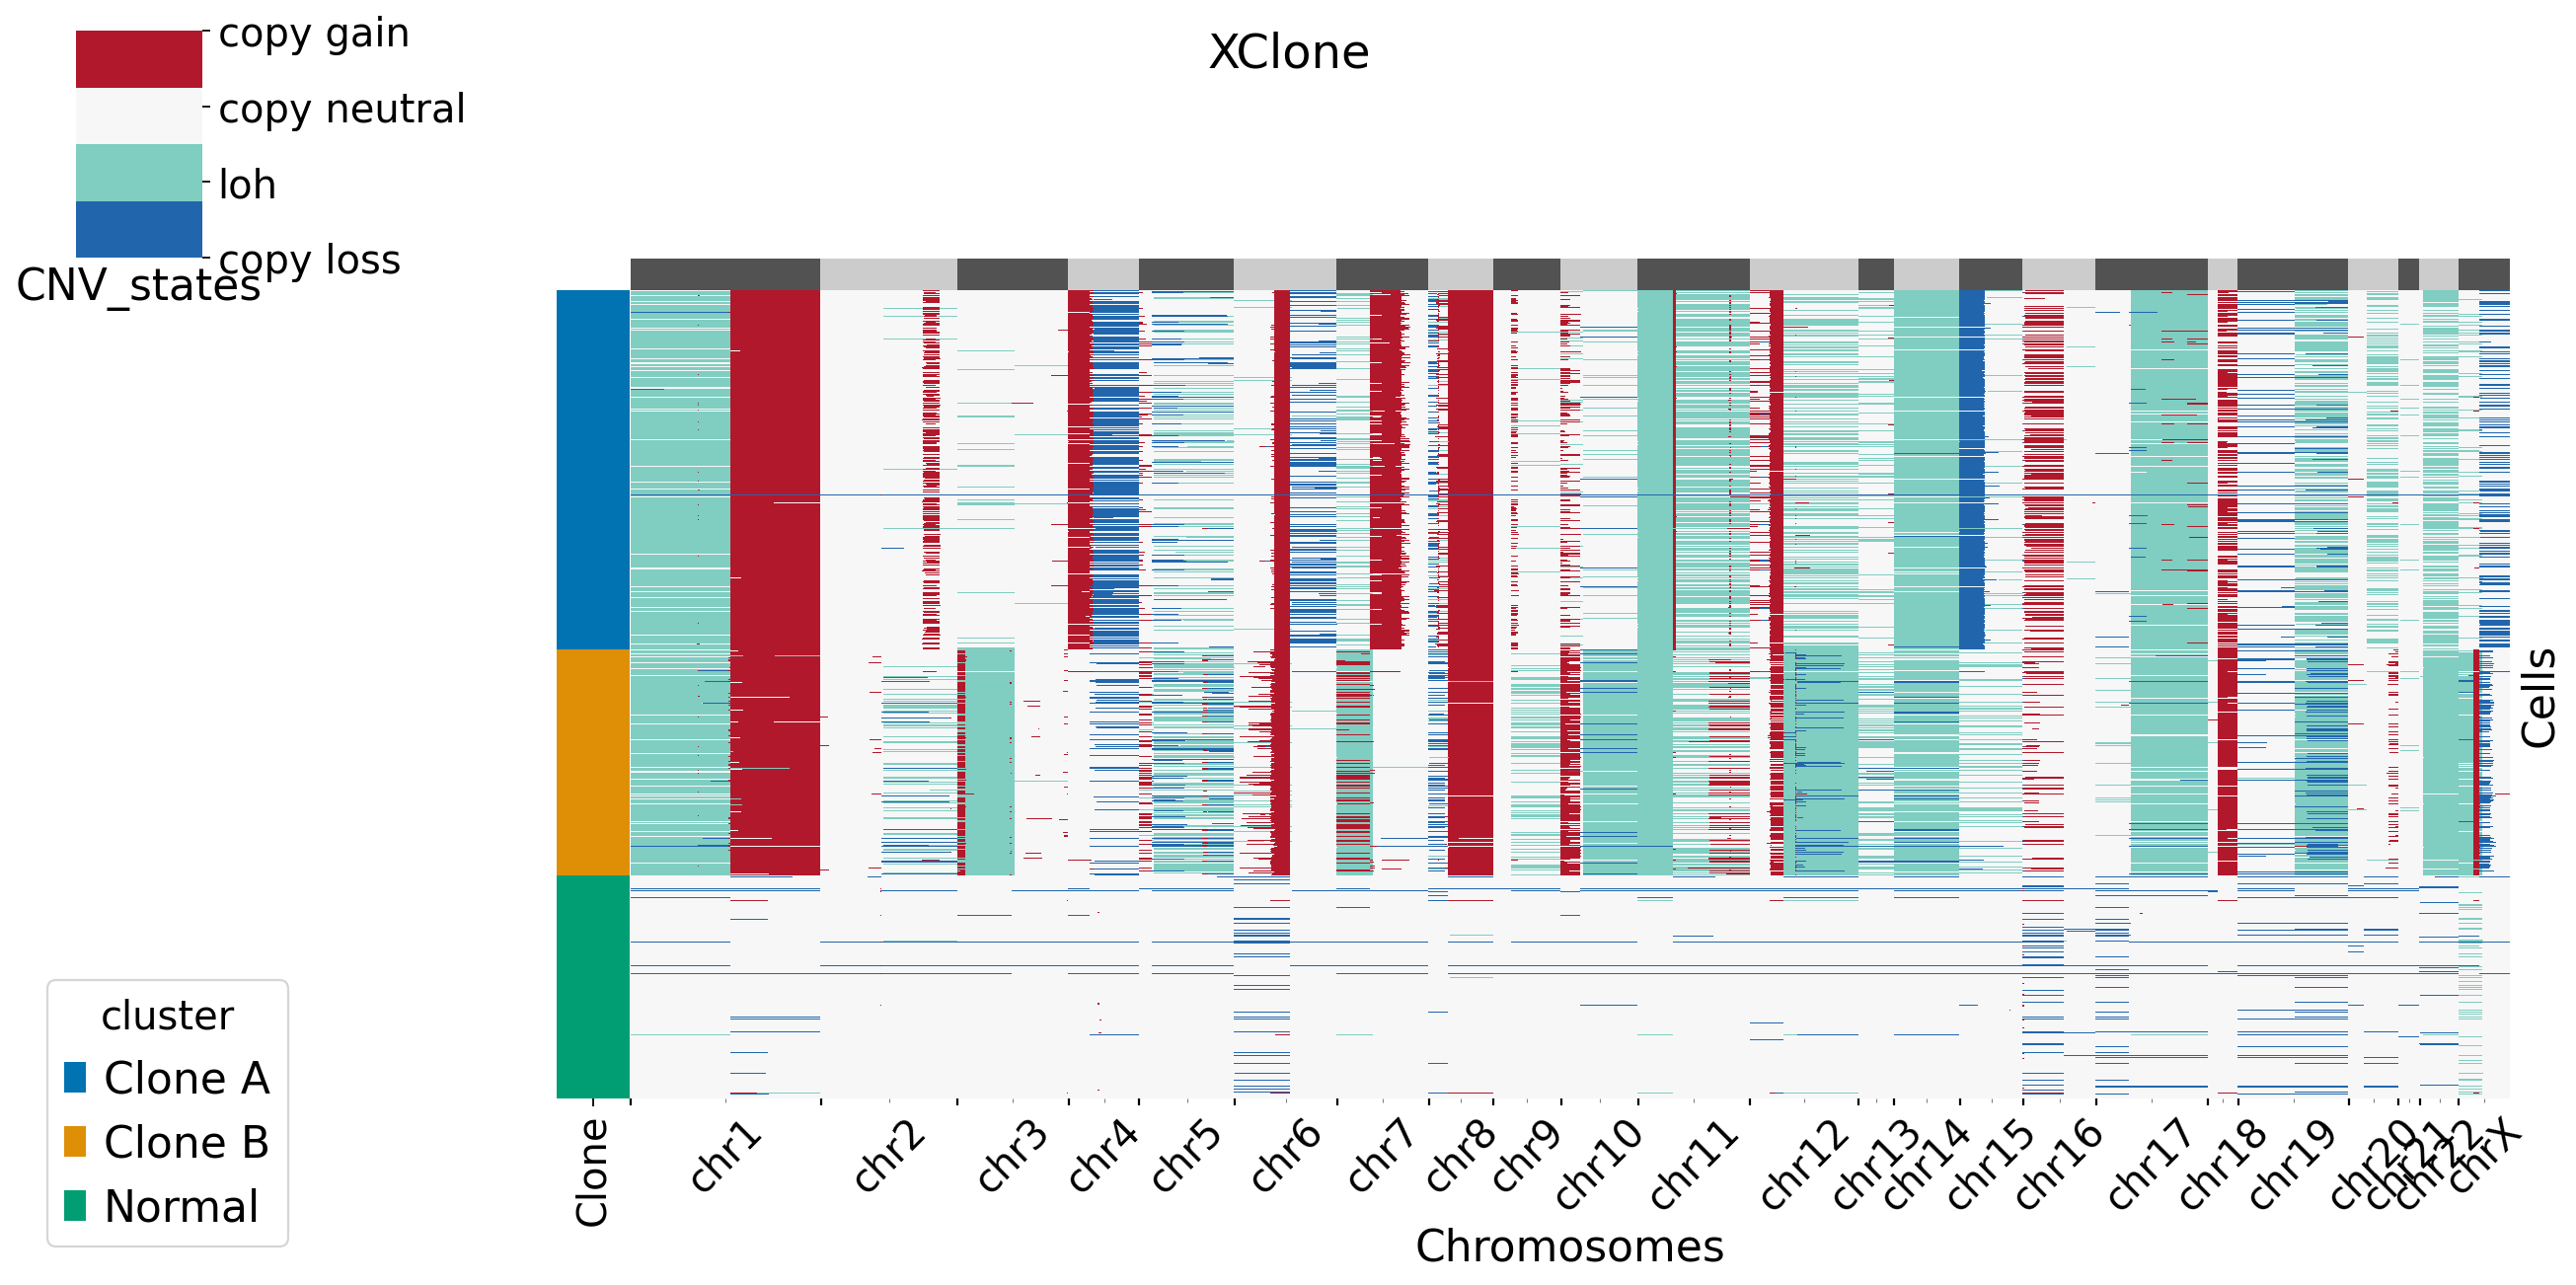

AnnData object with n_obs × n_vars = 1097 × 6402
    obs: 'copykat.pred', 'cluster.pred', 'cluster', 'mit_clone_id', 'confident', 'tumor', 'copykat', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped', 'gene_index'
    uns: 'data_mode', 'data_notes', 'genome_mode', 'log', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors', 'sort_chr_dict', 'guide_CNV_chrs_use_layers', 'guide_CNV_chrs_use_anno_key', 'ref_log_expression_brk', 'group_genes', 'CNV_ratio', 'Logliklihood'
    obsm: 'select_chr_index', 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected', 'WMA_smoothed', 'RDR_smooth', 'emm_prob_log', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx

In [11]:
xconfig = xclone.XCloneConfig(dataset_name = "TNBC1_scRNA", module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/TNBC1_scRNA/"

xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)